In [49]:
from  pcdet.models.dense_heads.target_assigner.anchor_generator import AnchorGeneratorRV as AnchorGenerator


In [50]:
from easydict import EasyDict
config = [
        EasyDict({
            # 'anchor_sizes': [[2.1, 4.7, 1.7], [0.86, 0.91, 1.73], [0.84, 1.78, 1.78]],

            # 'anchor_heights': [0, 0.5],
            'class_name': 'Car',
            'anchor_sizes': [[3.9, 1.6, 1.56]],
            'anchor_rotations': [0, 1.57],
            'anchor_bottom_heights': [-1.78],
            'align_center': True,
            'feature_map_stride': 8,
            'matched_threshold': 0.6,
            'unmatched_threshold': 0.4,
        })
    ]

A = AnchorGenerator(
        anchor_range= [6, -40, -3, 70.4, 40, 1],
        anchor_generator_config=config
    )


anchors, num_anchors_per_location = A.generate_anchors([[64,64]])

In [51]:
anchors[0].shape

torch.Size([1, 64, 64, 1, 2, 7])

In [52]:
from visual_utils.vis import kitti_vis
import numpy as np

In [53]:
anchors[0][0,0]

tensor([[[[  4.3778,  -4.2716,  -1.0000,   3.9000,   1.6000,   1.5600,   0.7731],
          [  4.3778,  -4.2716,  -1.0000,   3.9000,   1.6000,   1.5600,   2.3431]]],


        [[[  4.5495,  -4.4392,  -1.0000,   3.9000,   1.6000,   1.5600,   0.7731],
          [  4.5495,  -4.4392,  -1.0000,   3.9000,   1.6000,   1.5600,   2.3431]]],


        [[[  4.7280,  -4.6133,  -1.0000,   3.9000,   1.6000,   1.5600,   0.7731],
          [  4.7280,  -4.6133,  -1.0000,   3.9000,   1.6000,   1.5600,   2.3431]]],


        [[[  4.9134,  -4.7943,  -1.0000,   3.9000,   1.6000,   1.5600,   0.7731],
          [  4.9134,  -4.7943,  -1.0000,   3.9000,   1.6000,   1.5600,   2.3431]]],


        [[[  5.1062,  -4.9824,  -1.0000,   3.9000,   1.6000,   1.5600,   0.7731],
          [  5.1062,  -4.9824,  -1.0000,   3.9000,   1.6000,   1.5600,   2.3431]]],


        [[[  5.3065,  -5.1778,  -1.0000,   3.9000,   1.6000,   1.5600,   0.7731],
          [  5.3065,  -5.1778,  -1.0000,   3.9000,   1.6000,   1.5600,   2.343

In [54]:
from pcdet.datasets.kitti.kitti_dataset import KittiDataset
from pcdet.config import cfg, cfg_from_yaml_file
from pcdet.utils import common_utils
from pathlib import Path

cfg_from_yaml_file('cfgs/kitti_models/second.yaml', cfg)

# args, cfg = parse_config()


logger = common_utils.create_logger()
logger.info(
    '-----------------Quick Demo of OpenPCDet-------------------------')
dataset = KittiDataset(
    dataset_cfg=cfg.DATA_CONFIG, class_names=cfg.CLASS_NAMES, training=False,
    root_path=Path("../data/kitti/"), logger=logger
)
logger.info(f'Total number of samples: \t{len(dataset)}')

2020-08-06 11:32:51,190   INFO  -----------------Quick Demo of OpenPCDet-------------------------
2020-08-06 11:32:51,190   INFO  -----------------Quick Demo of OpenPCDet-------------------------
2020-08-06 11:32:51,190   INFO  -----------------Quick Demo of OpenPCDet-------------------------
2020-08-06 11:32:51,190   INFO  -----------------Quick Demo of OpenPCDet-------------------------
2020-08-06 11:32:51,190   INFO  -----------------Quick Demo of OpenPCDet-------------------------
2020-08-06 11:32:51,190   INFO  -----------------Quick Demo of OpenPCDet-------------------------
2020-08-06 11:32:51,333   INFO  Loading KITTI dataset
2020-08-06 11:32:51,333   INFO  Loading KITTI dataset
2020-08-06 11:32:51,333   INFO  Loading KITTI dataset
2020-08-06 11:32:51,333   INFO  Loading KITTI dataset
2020-08-06 11:32:51,333   INFO  Loading KITTI dataset
2020-08-06 11:32:51,333   INFO  Loading KITTI dataset
2020-08-06 11:32:51,581   INFO  Total samples for KITTI dataset: 3769
2020-08-06 11:32:5

In [59]:
# anchors[0] = anchors[0].permute(2,1,0,3,4,5).contiguous()
anchors_np = anchors[0].permute(2,1,0,3,4,5).contiguous().cpu().numpy()


bev_map = kitti_vis(dataset[0]['points'], anchors_np.reshape(-1,7)[1::17,:])

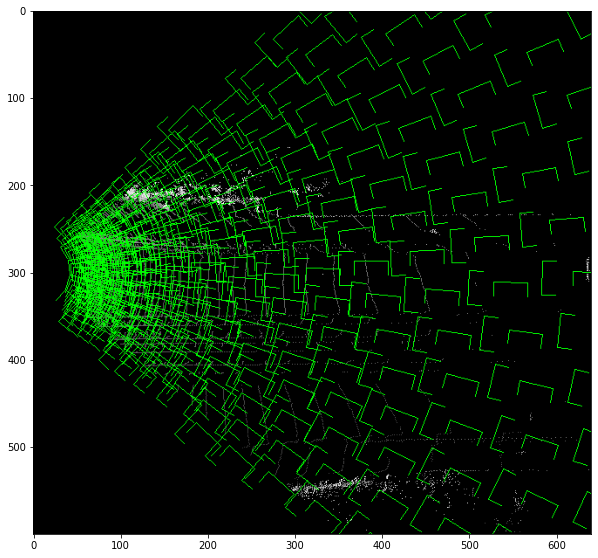

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.imshow(bev_map)